In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Game Sales

In this portfolio task you are provided with sales data for video games released between 1985 and 2016. This includes a regional breakdown of sales and basic product information (genre, platform, etc.). You are also given some critic and user review data from Metacritic in a separate file which you will need to combine with the first dataset. You will need to do some preparation of the data then address a number of analysis questions with plots as well as written answers.

### Description of Fields

* Name - The game's name
* Platform - Platform of the games release
* YearofRelease - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales (in millions)
* Critic_score - Aggregate score compiled by Metacritic staff
* Critic_count - The number of critics used in coming up with the critic score
* User_score - Score by Metacritic's subscribers
* User_count - Number of users who gave the user score
* Rating - The [ESRB ratings](https://www.esrb.org/ratings-guide/)

Original dataset credit: [Rush Kirubi](https://www.kaggle.com/rush4ratio), [Gregory Smith](https://www.kaggle.com/gregorut) and [Kendall Gillies](https://www.kaggle.com/kendallgillies).

## Tasks
1. Cleaning and Preparation
    * A) Load the ratings dataset (stored in 'files\ratings.csv') as a pandas dataframe and merge it with the sales data.
    * B) Some titles have no year of release recorded and might be difficult to work with, identify these titles and deal with them then fix the type of the column. **Hint**: You can remove them **with justification** or impute a year of release **appropriate to the platform**.
    * C) Identify and remove any extreme outliers in global sales.
    * D) (Optional) Discuss the cause of the outlier.
    * E) (Optional) You can remove any other data that is disruptive or irrelevant to your work **with justification**.
2. Visualization and Analysis:
    * A) Show the distribution of global game sales by genre. **Hint**: You will need to use some aggregation for this and subsequent tasks.
    * B) Sales are divided into regions (North America, Europe, Japan and Other), explore the relationships between sales in different regions. Are a game's sales in the Japanese market or the North American market a better predictor of success in Europe?
    * C) Visualize the relationship between genre and region in terms of total sales. Does the popularity of different genres vary by region? If so, what are the most notable differences?
    * D) Some outlets have [claimed](https://medium.com/defiant/video-game-reviews-are-broken-af05335f9b57) that recently, critics have have been pressured to give more positive reviews or face reduced access. Plot and compare the average critic scores and user scores by release year since 2000. Do you think this claim is supported?
    


#### 1A) Load the ratings dataset (stored in 'files\ratings.csv') as a pandas dataframe and merge it with the sales data.

**Action:** Load sales data as a dataframe

In [7]:
sales_df = pd.read_csv(os.path.join("files", "game_sales_data.csv"))
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


**Action:** Load ratings data as a dataframe

In [4]:
ratings_df = pd.read_csv(os.path.join("files", "ratings.csv"))
ratings_df.head()

,Name,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,76.0,51.0,8.0,324.0
1,Mario Kart Wii,82.0,73.0,8.3,712.0
2,Wii Sports Resort,80.0,73.0,8.0,193.0
3,New Super Mario Bros.,89.0,65.0,8.5,433.0
4,Wii Play,58.0,41.0,6.6,129.0


**Action:** Merge both sales and ratings dataframes by left join with sales (which has more records)

In [8]:
merged_df = pd.merge(sales_df, ratings_df, on="Name", how="left")
merged_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,76.0,51.0,8.0,324.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


#### 1B) Some titles have no year of release recorded and might be difficult to work with, identify these titles and deal with them then fix the type of the column. 

**Action:** Create a dataframe where there is no year of release

In [14]:
no_year = merged_df[pd.isna(merged_df['Year_of_Release'])] 
no_year.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
12795,Mobile Ops: The One Year War,X360,NaN,Simulation,Namco Bandai Games,0.0,0.0,0.06,0.0,0.06,NaN,NaN,NaN,NaN,NaN
14210,Housekeeping,DS,NaN,Action,Unknown,0.0,0.0,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN
14532,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,Unknown,0.0,0.0,0.03,0.0,0.03,NaN,NaN,NaN,NaN,NaN
15162,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN
15784,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN


**Action:** Check number of rows

In [15]:
print('Shape of no_year dataframe:', no_year.shape)

Shape of no_year dataframe: (8, 15)


**Action:** Check number of rows for merged dataframe

In [10]:
print('Shape of merged dataframe:', merged_df.shape)

Shape of merged dataframe: (17416, 15)


**Action:** Explore data for other columns

In [17]:
no_year.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
12795,Mobile Ops: The One Year War,X360,NaN,Simulation,Namco Bandai Games,0.0,0.0,0.06,0.0,0.06,NaN,NaN,NaN,NaN,NaN
14210,Housekeeping,DS,NaN,Action,Unknown,0.0,0.0,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN
14532,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,Unknown,0.0,0.0,0.03,0.0,0.03,NaN,NaN,NaN,NaN,NaN
15162,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN
15784,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.0,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN


**Action:** Check shape of the merged dataframe

In [18]:
merged_df.shape

(17416, 15)

#### Finding: There are only 8 records that do not have year of release, and the other columns for these records do not have values.')

#### Recommendation: Removing the 8 records from the dataframe of 17416 records will not negatively impact the analysis. Hence it is recommended to remove them.

**Action:** Remove records that do not have year of release from the merged dataframe

In [19]:
merged_df2 = merged_df.dropna(subset=['Year_of_Release'])
merged_df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,76.0,51.0,8.0,324.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


**Action:** Check that number of rows is correct (17416-8=17408)

In [20]:
merged_df2.shape

(17408, 15)

Number of rows is correct in the new dataframe

#### 1C) Identify and remove any extreme outliers in global sales.

**Action:** Describe the global_sales distribution

In [21]:
merged_df2['Global_Sales'].describe()

count    17408.000000
mean         0.516695
std          1.526439
min          0.010000
25%          0.050000
50%          0.160000
75%          0.450000
max         82.540000
Name: Global_Sales, dtype: float64

With a mean of 0.5 and standard deviation of 1.5. The max of 82.5 indicates presence of a extreme outlier.

**Action:** Create a series with global sales column

In [22]:
global_sales = merged_df2['Global_Sales']
global_sales.head()

0    82.54
1    40.24
2    35.57
3    32.78
4    31.37
Name: Global_Sales, dtype: float64

**Action:** Plot a boxplot to show the distribution of global sales

Text(0, 0.5, 'Global Sales')

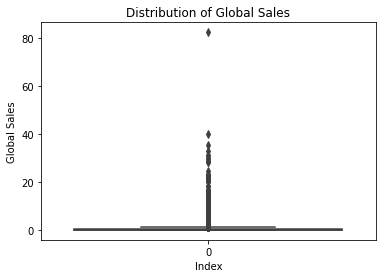

In [23]:
sns.boxplot(data=global_sales)
plt.title('Distribution of Global Sales')
plt.xlabel('Index')
plt.ylabel('Global Sales')

There is 1 extreme outlier, where global sales is above 80. This needs to be removed.

**Action:** Remove the 1 outlier from the dataframe, where global sales is more than 80

In [24]:
merged_df3 = merged_df2.drop(merged_df2[merged_df2.Global_Sales > 80].index)
merged_df3.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN


**Action:** Check that number of rows is correct after the drop (17408-1=17407)

In [25]:
merged_df3.shape

(17407, 15)

The number of rows for the new dataframe is correct

#### 1D) Discuss the cause of the outlier.

**Action:** Create new dataframe that contain sales stats only.

In [27]:
sales_stats = merged_df3[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_stats.head()

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,40.24,29.08,3.58,6.81,0.77
2,35.57,15.68,12.80,3.79,3.29
3,32.78,15.61,10.95,3.28,2.95
4,31.37,11.27,8.89,10.22,1.00
5,30.26,23.20,2.26,4.22,0.58


**Action:** Plot a boxplot

Text(0, 0.5, 'Count')

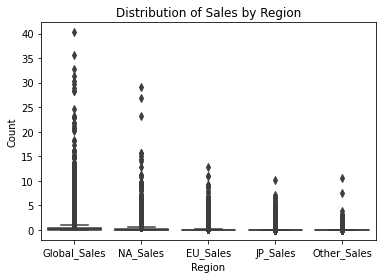

In [28]:
sns.boxplot(data=sales_stats)
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')

There is a extreme outlier for NA_Sales and EU_Sales respectively as well.

**Action:** Check if the sum of all region sales equals to global sales

In [33]:
sum_region_sales = merged_df3['NA_Sales'] + merged_df3['EU_Sales'] + merged_df3['JP_Sales'] + merged_df3['Other_Sales']

# convert view into a dataframe
merged_df3 = pd.DataFrame(merged_df3)
merged_df3['Sum_Sales'] = sum_region_sales
merged_df3[['Global_Sales','Sum_Sales']].head()

,Global_Sales,Sum_Sales
1,40.24,40.24
2,35.57,35.56
3,32.78,32.79
4,31.37,31.38
5,30.26,30.26


The sum of sales for all regions is equilavent to the global sales field.

**Action:** Drop the sum sales column which is not needed anymore

In [34]:
merged_df3 = merged_df3.drop(['Sum_Sales'], axis=1)
merged_df3.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN


#### Finding: The extreme outlier for NA_Sales and EU_Sales was Wii Sports, which was also the extreme outlier for Global_Sales. This indicates that the cause of the outlier was due to the fact that Wii Sports had extreme sales in both North America and Europe, hence totaling up to an extreme Global sales.

#### 1E) You can remove any other data that is disruptive or irrelevant to your work with justification.

**Action:** Plot boxplot to observe for any other outliers across the region sales

Text(0, 0.5, 'Count')

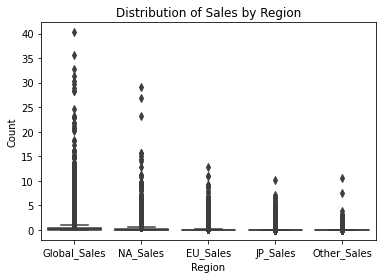

In [35]:
sns.boxplot(data=sales_stats)
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')

- There are 3 outlier records that have higher than 20 NA_Sales
- There is 1 outlier record that have higher than 10 JP_Sales
- There are 2 outlier records that have higher than 6 Other_Sales

**Action:** Remove the outlier records across NA_Sales, JP_Sales and Other_Sales

In [37]:
merged_df4 = merged_df3.drop(merged_df3[merged_df3.NA_Sales > 20].index)
merged_df4 = merged_df4.drop(merged_df4[merged_df4.JP_Sales > 10].index)
merged_df4 = merged_df4.drop(merged_df4[merged_df4.Other_Sales > 6].index)
sales_stats = merged_df4[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_stats.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,15.68,12.80,3.79,3.29
3,15.61,10.95,3.28,2.95
6,11.28,9.15,6.50,2.88
7,13.96,9.18,2.93,2.84
8,14.48,6.95,4.70,2.25


**Action:** Plot the boxplot to review the distribution of sales across the regions after removing the outliers

Text(0, 0.5, 'Count')

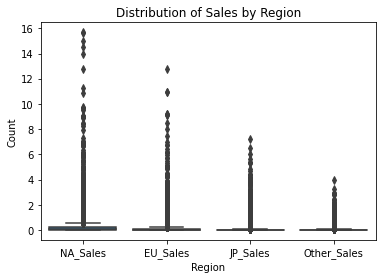

In [38]:
sns.boxplot(data=sales_stats)
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')

The distribution of sales across all 4 regions are more normalized now that the outliers are removed

#### 2A) Show the distribution of global game sales by genre

In [39]:
merged_df4.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Get the sum of global sales, grouped by genre.

In [40]:
genre_global_sales = merged_df4[['Genre','Global_Sales']].groupby(['Genre']).sum()

**Action:** Sort by descending global sales

In [42]:
genre_global_sales = genre_global_sales.sort_values(by='Global_Sales',ascending=False)
genre_global_sales.head()

,Global_Sales
Genre,
Action,1741.08
Sports,1258.45
Shooter,1038.97
Role-Playing,917.94
Misc,808.78


**Action:** Plot the distribution of global sales by genre

The top selling genre was Action -  followed by Sports and Shooter
The lowest selling genres were Strategy, Adventure and Puzzle


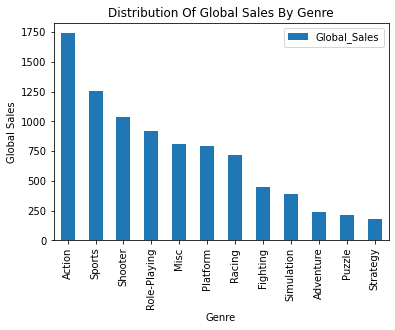

In [16]:
genre_global_sales.plot(kind='bar')
plt.title('Distribution Of Global Sales By Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
print('The top selling genre was Action -  followed by Sports and Shooter')
print('The lowest selling genres were Strategy, Adventure and Puzzle')

- The top selling genre was Action -  followed by Sports and Shooter.
- The lowest selling genres were Strategy, Adventure and Puzzle.

#### 2B) Sales are divided into regions (North America, Europe, Japan and Other), explore the relationships between sales in different regions. Are a game's sales in the Japanese market or the North American market a better predictor of success in Europe?

**Action:** Create a dataframe of the sales by regions

In [44]:
region_sales = merged_df4[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,15.68,12.80,3.79,3.29
3,15.61,10.95,3.28,2.95
6,11.28,9.15,6.50,2.88
7,13.96,9.18,2.93,2.84
8,14.48,6.95,4.70,2.25


**Action:** Calculate the correlation across all regions

In [45]:
region_sales.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.783402,0.420896,0.709665
EU_Sales,0.783402,1.000000,0.419242,0.826815
JP_Sales,0.420896,0.419242,1.000000,0.319922
Other_Sales,0.709665,0.826815,0.319922,1.000000


**Action:** Plot the correlation into a heatmap matrix for better visualisation

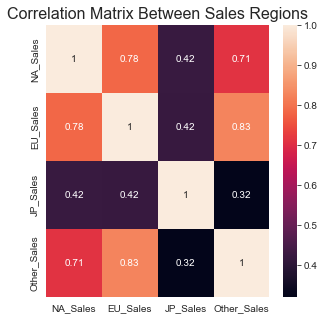

In [96]:
f = plt.figure(figsize=(5, 5))
sns.heatmap(region_sales.corr(), annot=True)
plt.title('Correlation Matrix Between Sales Regions', fontsize=16);

#### Are a game's sales in the Japanese market or the North American market a better predictor of success in Europe?

- The lighter the colour, the higher the correlation
- Finding: NA_Sales has a light colour against EU_Sales, meanwhile JP_Sales has a hard colour against EU_Sales.
- This indicates that North America market is more closely correlated to Europe market, hence a game's sales in the North American market is a better predictor of success in Europe.

#### 2C) Visualize the relationship between genre and region in terms of total sales. Does the popularity of different genres vary by region? If so, what are the most notable differences?

**Action:** Create a dataframe with columns for genre, region and global_sales

In [46]:
genre_region_sales = merged_df4[['Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_region_sales.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,Racing,15.68,12.80,3.79,3.29,35.57
3,Sports,15.61,10.95,3.28,2.95,32.78
6,Platform,11.28,9.15,6.50,2.88,29.81
7,Misc,13.96,9.18,2.93,2.84,28.92
8,Platform,14.48,6.95,4.70,2.25,28.38


**Action:** Get the sum of sales for each region, grouped by genre

In [49]:
genre_region_sales = merged_df4[['Genre','Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Genre']).sum()

**Action:** Sort by descending global sales

In [48]:
genre_region_sales = genre_region_sales.sort_values(by='Global_Sales',ascending=False)
genre_region_sales.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,Racing,15.68,12.80,3.79,3.29,35.57
3,Sports,15.61,10.95,3.28,2.95,32.78
6,Platform,11.28,9.15,6.50,2.88,29.81
7,Misc,13.96,9.18,2.93,2.84,28.92
8,Platform,14.48,6.95,4.70,2.25,28.38


**Action:** Create a new column of each region sales contribution of global sales

In [50]:
genre_region_sales['na_proportion'] = genre_region_sales['NA_Sales'] / genre_region_sales['Global_Sales']
genre_region_sales['eu_proportion'] = genre_region_sales['EU_Sales'] / genre_region_sales['Global_Sales']
genre_region_sales['jp_proportion'] = genre_region_sales['JP_Sales'] / genre_region_sales['Global_Sales']
genre_region_sales['other_proportion'] = genre_region_sales['Other_Sales'] / genre_region_sales['Global_Sales']
genre_region_sales.head()

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,na_proportion,eu_proportion,jp_proportion,other_proportion
Genre,,,,,,,,,
Action,1741.08,875.89,524.91,163.16,175.99,0.503073,0.301485,0.093712,0.101081
Adventure,241.55,106.25,64.43,53.90,16.76,0.439868,0.266736,0.223142,0.069385
Fighting,449.17,224.13,100.74,87.88,36.51,0.498987,0.224280,0.195650,0.081283
Misc,808.78,409.81,214.64,108.66,74.91,0.506701,0.265387,0.134351,0.092621
Platform,791.50,417.76,198.29,124.56,50.61,0.527808,0.250524,0.157372,0.063942


**Action:** Select only the region proportion columns

In [51]:
genre_region_sales_proportion = genre_region_sales[['na_proportion', 'eu_proportion', 'jp_proportion', 'other_proportion']]
genre_region_sales_proportion                                           

,na_proportion,eu_proportion,jp_proportion,other_proportion
Genre,,,,
Action,0.503073,0.301485,0.093712,0.101081
Adventure,0.439868,0.266736,0.223142,0.069385
Fighting,0.498987,0.224280,0.195650,0.081283
Misc,0.506701,0.265387,0.134351,0.092621
Platform,0.527808,0.250524,0.157372,0.063942
Puzzle,0.468103,0.224637,0.249040,0.055363
Racing,0.496535,0.329977,0.077418,0.095626
Role-Playing,0.354566,0.201124,0.378892,0.065484
Shooter,0.551585,0.309143,0.037268,0.101601


**Action:** Define variables for use to plot a bar chart

In [53]:
xx = genre_region_sales_proportion.index
yy1 = genre_region_sales_proportion['na_proportion']
yy2 = genre_region_sales_proportion['eu_proportion']
yy3 = genre_region_sales_proportion['jp_proportion']
yy4 = genre_region_sales_proportion['other_proportion']

**Action:** Plot bars in stack manner

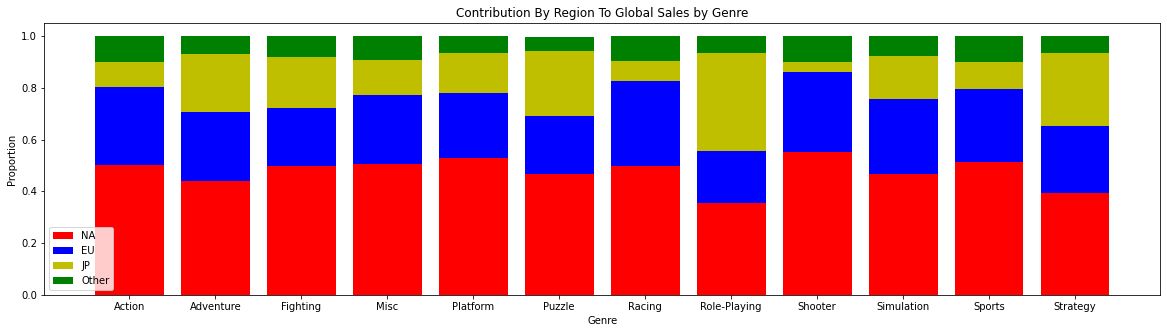

In [54]:
plt.figure(figsize=(20, 5))
plt.bar(xx, yy1, color='r')
plt.bar(xx, yy2, bottom=yy1, color='b')
plt.bar(xx, yy3, bottom=yy1+yy2, color='y')
plt.bar(xx, yy4, bottom=yy1+yy2+yy3, color='g')
plt.xlabel("Genre")
plt.ylabel("Proportion")
plt.legend(["NA", "EU", "JP", "Other"])
plt.title("Contribution By Region To Global Sales by Genre")
plt.show()

### Analysis - Popularity of Genre By Region

1. In North America, popularity of role-playing games is rather low. Whereas the popularity of the other genres are rather balanced.
2. This is quite similar to Europe where role-playing and fighting games are less popular, while the other genres are rather balanced.
3. However in Japan, there are bigger differences in popularity across different genres. While role-playing and strategy games are very popular, shooter and racing games are actually very poor in popularity.
4. While Role-Playing games are the least popular of all genres in North America, it is actually the most popular genre in Japan.
5. On the other hand - while Shooter games are the most popular genre in North America, it is actually the least popular in Japan

#### 2D) Some outlets have claimed that recently, critics have have been pressured to give more positive reviews or face reduced access. Plot and compare the average critic scores and user scores by release year since 2000. Do you think this claim is supported?

**Action:** Create new dataframe where year_of_release is 2000 and above

In [56]:
merged_2000s = merged_df4.drop(merged_df4[merged_df4.Year_of_Release < 2000].index)
merged_2000s.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Create new dataframe with columns for year of release, critic score, critic count, user score and user count

In [62]:
merged_2000s_scores = merged_2000s[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
merged_2000s_scores.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
2,2008.0,82.0,73.0,8.3,712.0
3,2009.0,80.0,73.0,8.0,193.0
6,2006.0,89.0,65.0,8.5,433.0
7,2006.0,58.0,41.0,6.6,129.0
8,2009.0,87.0,80.0,8.4,595.0


**Action:** Select year of release, critic and user score columns

In [109]:
millenium_year_scores = merged_2000s_scores.iloc[:, [0,1,3]]
millenium_year_scores.head()

,Year_of_Release,Critic_Score,User_Score
2,2008.0,82.0,8.3
3,2009.0,80.0,8.0
6,2006.0,89.0,8.5
7,2006.0,58.0,6.6
8,2009.0,87.0,8.4


**Action:** Create a lm plot with distribution of Critic Score and User Score

Text(0.5, 1.0, 'Critic Score vs User Score by Year')

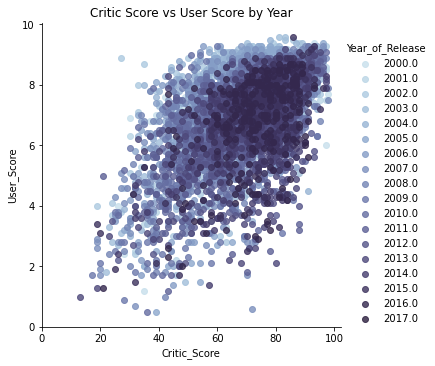

In [65]:
palette = sns.color_palette("ch:s=.25,rot=-.25", 18)

sns.lmplot(x='Critic_Score', y='User_Score', data=millenium_year_scores,
           fit_reg=False, # no regression line
           hue='Year_of_Release', # colour by 'Year of Release'
           palette=palette)
         
plt.xlim(0, None)
plt.ylim(0, None)
plt.title("Critic Score vs User Score by Year")

- This chart shows that a positive relationship between critic and user scores - so when a game's critic score is high, the user score tend to be high as well
- However the darkness of the spots is rather well spread out on the chart, thus making it difficult to visualize the relationship between critic and user scores over the years of release
- Hence we need to plot a different chart to better visualize the average score over the years, by average critic score VS average user score

**Action:** Aggregate the average critic and user scores by year

In [105]:
avg_critic_score = millenium_year_scores[['Year_of_Release','Critic_Score']].groupby(['Year_of_Release']).mean()
avg_user_score = millenium_year_scores[['Year_of_Release','User_Score']].groupby(['Year_of_Release']).mean()

**Action:** Plot two charts to visualize the annual trend for average critic score vs user scores

Text(0.5, 1.0, 'Average Annual User Score')

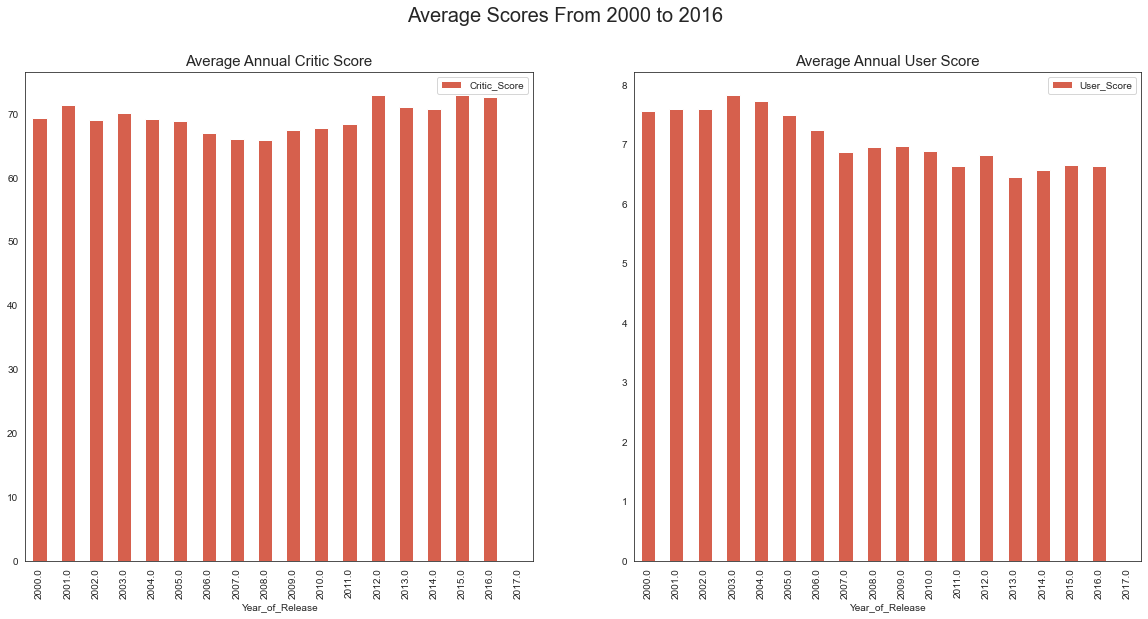

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6)) 

# Create plot 1
avg_critic_score.plot(kind='bar', figsize = (20,9), ax=axes[0])

# Create plot 2
avg_user_score.plot(kind='bar', figsize = (20,9), ax=axes[1])

plt.suptitle('Average Scores From 2000 to 2016', fontsize=20) # top level title
axes[0].set_title('Average Annual Critic Score', fontsize=15) #set title for first plot
axes[1].set_title('Average Annual User Score', fontsize=15) #set title for second plot

### Analysis - Average Critic and User Score Since 2000

1. There is a positive relationship between critic and user score - in that the higher the critic score for that year, the higher the user score as well
2. The average critic score went up in 2012 and maintained at high levels, however the average user score did not have the same trend. In fact average user scores dropped in 2007, and has stayed lower than average until 2016
3. This indicates that the improvement in critic scores especially in the recent years are not consistent with general users, hence making the critic scoring not representative of the general population
4. Due to this, the data here does indicate some evidence to support the claim that critics are indeed pressured to give more positive reviews. At least from 2012 onwards.

## Challenge

Assume that the year is 2016. A publisher is trying to enter the Japanese market and have planned to release 2 products:
* Game 1 - in a popular, established section of the market.
* Game 2 - in an emerging space that has been historically underserved.

Make suggestions for each product in terms of platform, genre and audience/rating based on the data. Support your suggestion with plots, summary statistics or notable examples, or refer to your previous analysis.


### Game 1 - in a popular, established section of the market.

**Action:** Use the merge_2000s dataframe for this analysis, in order to only look at data across the last 15 years

In [66]:
merged_2000s.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Remove 2016 and later data from the dataset, as we are looking at this during 2016

In [68]:
merged_till_2015 = merged_2000s.drop(merged_2000s[merged_df4.Year_of_Release > 2015].index)

C:\Users\p1331421\AppData\Local\Temp/ipykernel_9552/1703376594.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_till_2015 = merged_2000s.drop(merged_2000s[merged_df4.Year_of_Release > 2015].index)


**Action:** Check that year_of_release is between 2000 to 2015

In [69]:
merged_till_2015['Year_of_Release'].describe()

count    14778.000000
mean      2007.797875
std          3.879498
min       2000.000000
25%       2005.000000
50%       2008.000000
75%       2011.000000
max       2015.000000
Name: Year_of_Release, dtype: float64

The latest year of release in the dataframe is 2015, which is intended for this analysis

In [30]:
merged_till_2015.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Pull columns Year_of_Release, Platform, and JP_sales

In [70]:
challenge1_year_platform_sum_jp_sales = merged_till_2015.iloc[:, [2,1,7]]
challenge1_year_platform_sum_jp_sales.head()

,Year_of_Release,Platform,JP_Sales
2,2008.0,Wii,3.79
3,2009.0,Wii,3.28
6,2006.0,DS,6.50
7,2006.0,Wii,2.93
8,2009.0,Wii,4.70


**Action:** Pivot Year of release, by platform, with sum of JP_Sales as value

In [71]:
challenge1_platform_sales = pd.pivot_table(challenge1_year_platform_sum_jp_sales, values=['JP_Sales'], index='Year_of_Release',columns='Platform', aggfunc=np.sum)
challenge1_platform_sales.head()

JP_Sales                                                    \
Platform             3DS    DC    DS     G    GBA    GC   N64    PC     PS   
Year_of_Release                                                              
2000.0               NaN  2.54   NaN  8.36   0.00   NaN  7.72  0.00  14.60   
2001.0               NaN  1.07   NaN  4.65   7.46  3.85  0.53  0.00   3.86   
2002.0               NaN  0.29   NaN   NaN  12.21  5.28  0.00  0.00   1.64   
2003.0               NaN   NaN   NaN   NaN   8.59  6.67   NaN  0.00   0.00   
2004.0               NaN   NaN  3.65   NaN  14.29  3.00   NaN  0.08    NaN   

                                                                         
Platform           PS2 PS3 PS4   PSP PSV    WS Wii WiiU     X X360 XOne  
Year_of_Release                                                          
2000.0            8.87 NaN NaN   NaN NaN  0.68 NaN  NaN  0.00  NaN  NaN  
2001.0           17.79 NaN NaN   NaN NaN  0.28 NaN  NaN  0.37  NaN  NaN  
2002.0           22.39 NaN NaN   NaN NaN  0.01 NaN  NaN  0.49  NaN  NaN  
2003.0           19.10 NaN NaN   NaN NaN   NaN NaN  NaN  0.30  NaN  NaN  
2004.0           17.66 NaN NaN  2.03 NaN   NaN NaN  NaN  0.20  NaN  NaN

**Action:** Plot area chart

Text(0.5, 0, 'Year')

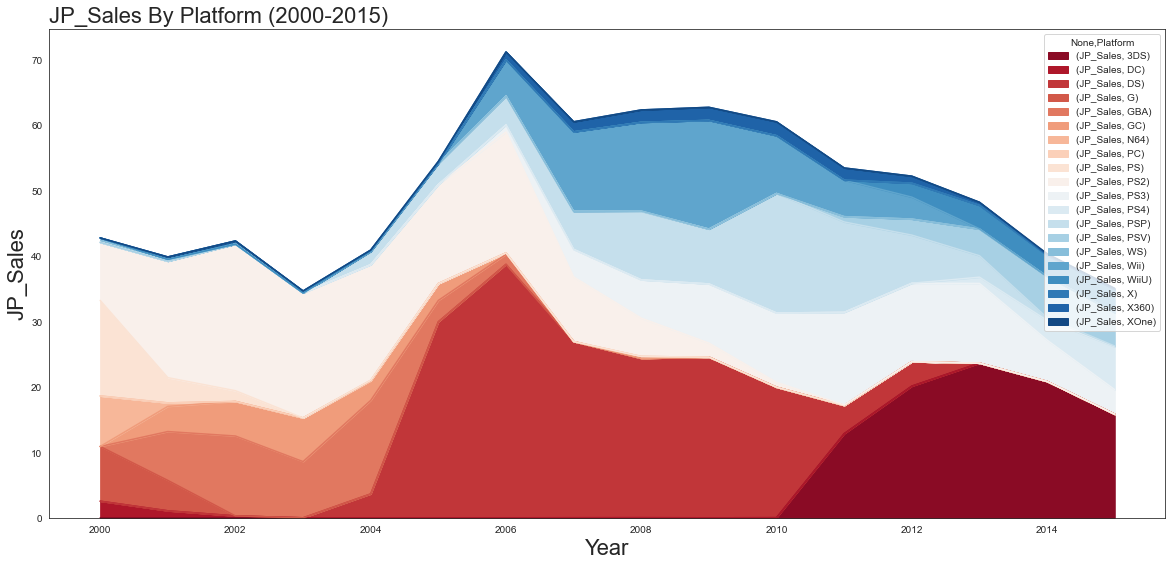

In [72]:
sns.set_style("white")
sns.set_palette("RdBu", 20)

challenge1_platform_sales.plot.area(figsize = (20,9))
plt.title("JP_Sales By Platform (2000-2015)", fontsize = 22, loc = 'left')
plt.ylabel("JP_Sales", fontsize = 22)
plt.xlabel("Year", fontsize = 22)

The platform with the largest sales since 2011 to 2015 is 3DS (Darkest Red) - indicating that this is the most popular platform in the recent years till 2015.

**Action:** Pull columns Year_of_Release, Genre, and JP_sales

In [73]:
challenge1_year_genre_sum_jp_sales = merged_till_2015.iloc[:, [2,3,7]]
challenge1_year_genre_sum_jp_sales.head()

,Year_of_Release,Genre,JP_Sales
2,2008.0,Racing,3.79
3,2009.0,Sports,3.28
6,2006.0,Platform,6.50
7,2006.0,Misc,2.93
8,2009.0,Platform,4.70


**Action:** Pivot Year of release, by platform, with sum of JP_Sales as value

In [74]:
challenge1_genre_sales = pd.pivot_table(challenge1_year_genre_sum_jp_sales, values=['JP_Sales'], index='Year_of_Release',columns='Genre', aggfunc=np.sum)
challenge1_genre_sales.head()

JP_Sales                                                  \
Genre             Action Adventure Fighting  Misc Platform Puzzle Racing   
Year_of_Release                                                            
2000.0              3.74      1.11     3.05  2.77     2.56   0.98   1.15   
2001.0              5.99      1.07     2.73  1.26     3.54   0.70   4.00   
2002.0              5.10      3.23     3.15  2.90     4.52   0.17   0.20   
2003.0              4.19      0.43     3.12  3.58     2.22   1.27   2.83   
2004.0              4.68      1.23     1.34  2.43     6.11   3.05   0.89   

                                                                 
Genre           Role-Playing Shooter Simulation Sports Strategy  
Year_of_Release                                                  
2000.0                 15.80    0.20       1.27   6.36     3.78  
2001.0                  9.55    0.53       3.77   3.90     2.82  
2002.0                 14.17    1.02       0.75   4.69     2.41  
2003.0                  9.74    0.21       1.46   4.05     1.56  
2004.0                 13.49    0.65       0.58   4.42     2.04

**Action:** Plot area chart

Text(0.5, 0, 'Year')

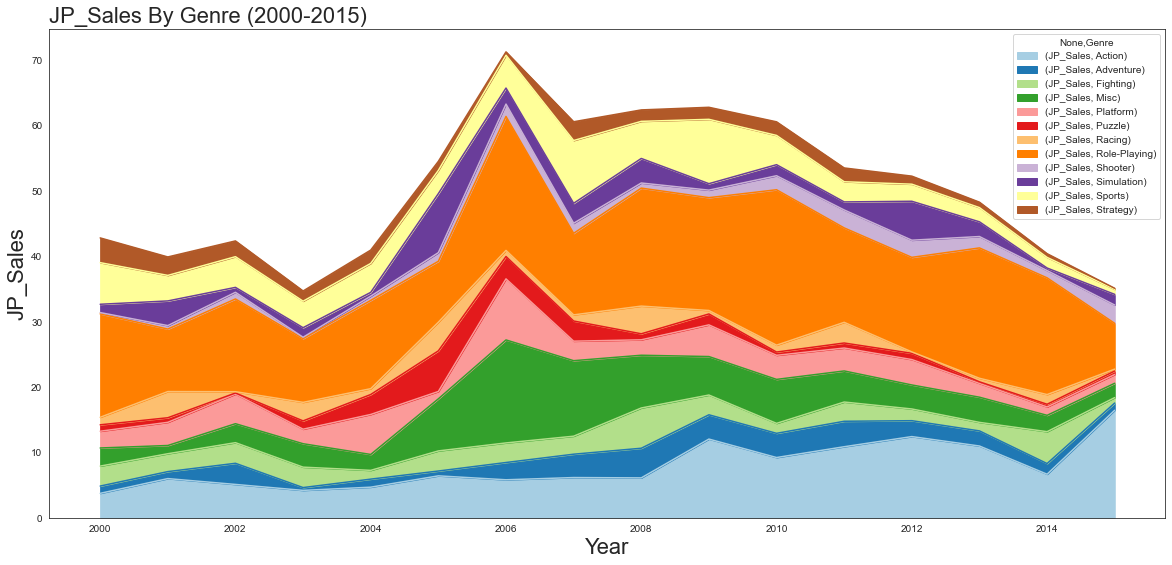

In [75]:
sns.set_style("white")
sns.set_palette("Paired", 20)

challenge1_genre_sales.plot.area(figsize = (20,9))
plt.title("JP_Sales By Genre (2000-2015)", fontsize = 22, loc = 'left')
plt.ylabel("JP_Sales", fontsize = 22)
plt.xlabel("Year", fontsize = 22)

The genre with the largest sales since 2011 to 2015 is Role-Playing (orange) - indicating that this is the most popular genre in the recent years till 2015.

**Action:** Get the highest JP_Sales by Critic score / User score

In [76]:
merged_till_2015.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Remove records with missing value for Rating

In [38]:
merged_till_2015 = merged_till_2015.dropna(subset=['Rating'])

**Action:** Observe the distribution for JP_Sales

In [77]:
merged_till_2015['JP_Sales'].describe()

count    14778.000000
mean         0.054243
std          0.244509
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max          6.500000
Name: JP_Sales, dtype: float64

JP_Sales has a mean of 0.05

**Action:** Extract records where the JP_Sales are above the mean

In [79]:
jp_merged_till_2015 = merged_till_2015.drop(merged_till_2015[merged_till_2015.JP_Sales < 0.04].index)

In [80]:
jp_merged_till_2015['JP_Sales'].describe()

count    3102.000000
mean        0.246515
std         0.487716
min         0.040000
25%         0.060000
50%         0.110000
75%         0.240000
max         6.500000
Name: JP_Sales, dtype: float64

In order to remove games that are unpopular in Japan, records with JP_Sales below the mean are removed.

**Action:** Pull columns Year_of_Release, Rating, and User_Count

In [81]:
challenge1_year_rating_user_count = jp_merged_till_2015.iloc[:, [2,10,14]]
challenge1_year_rating_user_count.head()

,Year_of_Release,Rating,User_Count
2,2008.0,E,712.0
3,2009.0,E,193.0
6,2006.0,E,433.0
7,2006.0,E,129.0
8,2009.0,E,595.0


**Action:** Pivot Year of release, by rating, with sum of User_Count as value

In [82]:
challenge1_rating_users = pd.pivot_table(challenge1_year_rating_user_count, values=['User_Count'], index='Year_of_Release',columns='Rating', aggfunc=np.sum)
challenge1_rating_users

User_Count                          
Rating                   E    E10+        M        T
Year_of_Release                                     
2000.0               377.0     NaN    161.0   1690.0
2001.0              2634.0     NaN   3920.0   2390.0
2002.0              3297.0     NaN   1283.0   2578.0
2003.0              1653.0    25.0    703.0   2162.0
2004.0              1942.0    78.0  11358.0   1034.0
2005.0              1966.0   921.0   3392.0   2766.0
2006.0              1592.0   935.0   5452.0   5889.0
2007.0              4717.0  1045.0  12857.0   6579.0
2008.0              7113.0   956.0  22802.0   5619.0
2009.0              2196.0   835.0  16807.0  13169.0
2010.0              4705.0   658.0  23296.0   5177.0
2011.0              3633.0  3667.0  36583.0  12852.0
2012.0              3515.0  1732.0  23014.0   5519.0
2013.0              6343.0  2418.0  38476.0   4752.0
2014.0              4859.0   781.0  25009.0  12598.0
2015.0              4119.0  2316.0  39203.0   6439.0

**Action:** Plot area chart

Text(0.5, 0, 'Year')

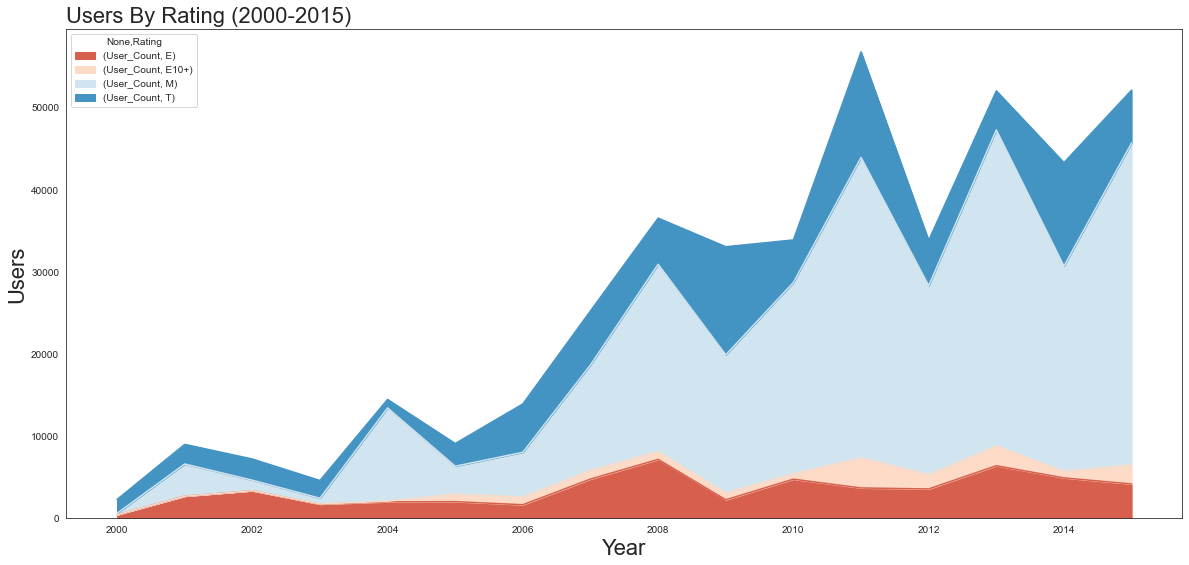

In [83]:
sns.set_style("white")
sns.set_palette("RdBu", 4)

challenge1_rating_users.plot.area(figsize = (20,9))
plt.title("Users By Rating (2000-2015)", fontsize = 22, loc = 'left')
plt.ylabel("Users", fontsize = 22)
plt.xlabel("Year", fontsize = 22)

The rating with the largest number of users since 2011 to 2015 is M (Light Blue) - indicating that this is the most popular game rating in the recent years till 2015.

### Game 1 - in a popular, established section of the market.

#### Recommendation

- In order to have a strong chance of success in a popular and established section of the gaming marketing in Japan, it is recommended to release a product on: 3DS platform, role-playing genre with a 'M' rating.

#### Summary

- The platform with the largest sales since 2011 to 2015 is 3DS (Darkest Red) - indicating that this is the most popular platform in the recent years till 2015
- The genre with the largest sales since 2011 to 2015 is Role-Playing (orange) - indicating that this is the most popular genre in the recent years till 2015
- The rating with the largest number of users since 2011 to 2015 is M (Pink) - indicating that this is the most popular game rating in the recent years till 2015

### Game 2 - in an emerging space that has been historically underserved.

In [44]:
merged_till_2015.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0


**Action:** Create a column with average sales of NA, EU and other to get an average of sales outside of JP

In [84]:
merged_till_2015['mean_non_jp_sales'] = (merged_till_2015['NA_Sales'] + merged_till_2015['EU_Sales'] + merged_till_2015['Other_Sales']) / 3
merged_till_2015.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count,mean_non_jp_sales
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0,10.590000
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0,9.836667
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0,7.770000
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0,8.660000
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,E,87.0,80.0,8.4,595.0,7.893333


**Action:** Find the top platforms in terms of non-JP sales, start by getting the sum of mean_non_jp_sales, grouped by platform

In [89]:
platform_non_jp_sales = merged_till_2015[['Platform','mean_non_jp_sales']].groupby(['Platform']).sum()

**Action:** Sort by ascending global sales

In [88]:
platform_non_jp_sales = platform_non_jp_sales.sort_values(by='mean_non_jp_sales',ascending=True)
platform_non_jp_sales.head()

,mean_non_jp_sales
Platform,
WS,0.000000
DC,1.150000
G,5.330000
N64,9.696667
PSV,10.870000


**Action:** Get the sum of JP_sales, grouped by platform, and sort by ascending JP sales

In [90]:
platform_jp_sales = merged_till_2015[['Platform','JP_Sales']].groupby(['Platform']).sum()
platform_jp_sales = platform_jp_sales.sort_values(by='JP_Sales',ascending=True)
platform_jp_sales.head()

,JP_Sales
Platform,
PC,0.08
XOne,0.35
WS,0.97
X,1.38
DC,3.96


**Action:** Plot two bar charts on a row, with top selling platforms for Non-JP vs JP markets

Text(0.5, 1.0, 'JP Markets')

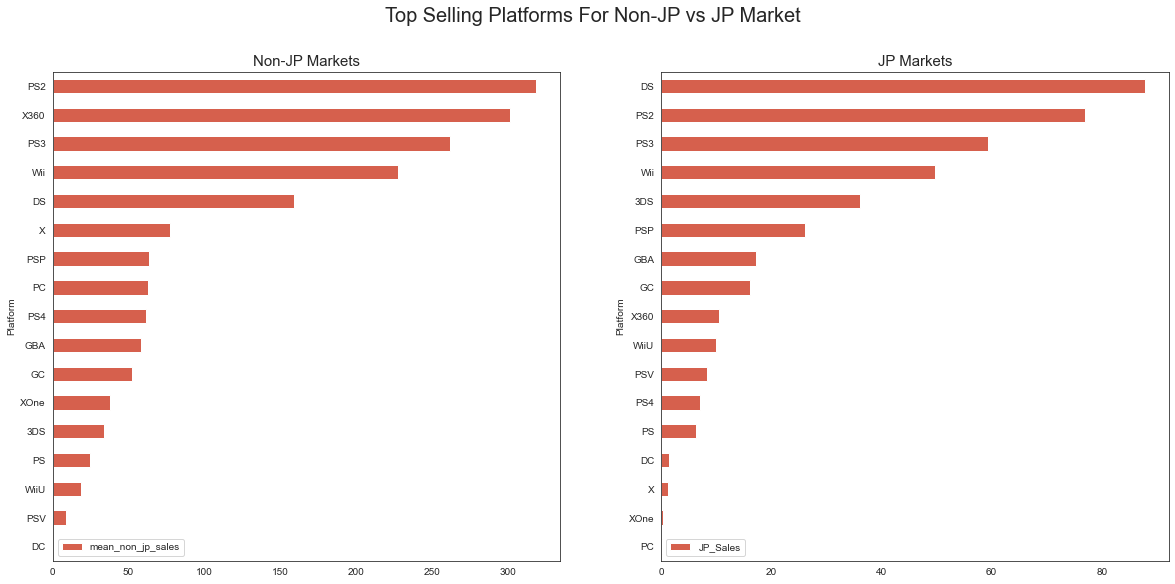

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6)) 

# Create plot 1
platform_non_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[0])

# Create plot 2
platform_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[1])

plt.suptitle('Top Selling Platforms For Non-JP vs JP Market', fontsize=20) # top level title
axes[0].set_title('Non-JP Markets', fontsize=15) #set title for first plot
axes[1].set_title('JP Markets', fontsize=15) #set title for second plot

X360 was top 2 best selling platform in Non-JP markets, but only number 9 in JP market - indicating a very popular platform that has not yet hit its potential in JP market.

**Action:** Find the top genre in terms of non-JP sales, start by getting the sum of mean_non_jp_sales, grouped by genre and then sorted by ascending sales

In [91]:
genre_non_jp_sales = merged_till_2015[['Genre','mean_non_jp_sales']].groupby(['Genre']).sum()
genre_non_jp_sales = genre_non_jp_sales.sort_values(by='mean_non_jp_sales',ascending=True)
genre_non_jp_sales.head()

,mean_non_jp_sales
Genre,
Strategy,29.453333
Puzzle,38.503333
Adventure,49.260000
Fighting,89.460000
Simulation,99.066667


**Action:** Get the sum of JP_Sales, grouped by genre and then sorted by ascending sales

In [92]:
genre_jp_sales = merged_till_2015[['Genre','JP_Sales']].groupby(['Genre']).sum()
genre_jp_sales = genre_jp_sales.sort_values(by='JP_Sales',ascending=True)
genre_jp_sales.head()

,JP_Sales
Genre,
Shooter,22.44
Puzzle,24.89
Racing,26.81
Strategy,27.94
Adventure,37.32


**Action:** Plot the distribution of Non-JP Sales vs JP sales by genre

Text(0.5, 1.0, 'JP Markets')

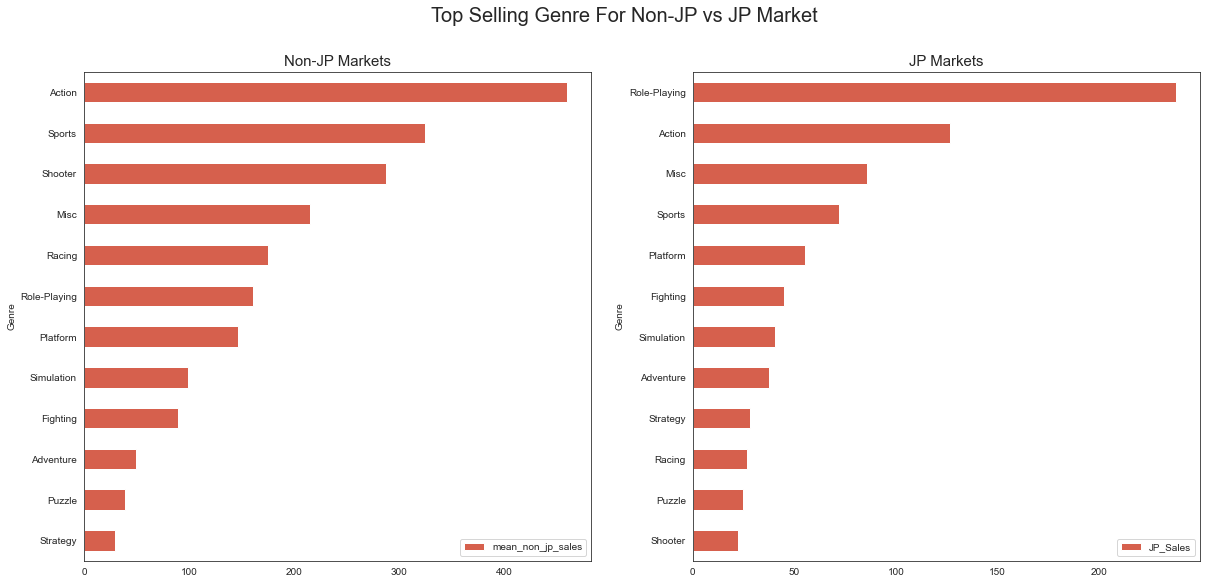

In [93]:
# Set plot axis at 1X2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6)) 

# Create plot 1
genre_non_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[0])

# Create plot 2
genre_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[1])

plt.suptitle('Top Selling Genre For Non-JP vs JP Market', fontsize=20) # top level title
axes[0].set_title('Non-JP Markets', fontsize=15) #set title for first plot
axes[1].set_title('JP Markets', fontsize=15) #set title for second plot

Shooter was top 3 best selling genre in Non-JP markets, but only number 9 in JP market - indicating a very popular genre that has not yet hit its potential in JP market.

**Action:** Find the top rating in terms of non-JP sales, start by getting the sum of mean_non_jp_sales, grouped by rating and then sorted by ascending sales

In [94]:
rating_non_jp_sales = merged_till_2015[['Rating','mean_non_jp_sales']].groupby(['Rating']).sum()
rating_non_jp_sales = rating_non_jp_sales.sort_values(by='mean_non_jp_sales',ascending=True)
rating_non_jp_sales.head()

,mean_non_jp_sales
Rating,
RP,0.030000
EC,0.583333
AO,0.653333
E10+,204.256667
T,418.316667


**Action:** Find the top rating in terms of JP sales, start by getting the sum of JP_Sales, grouped by rating and then sorted by ascending sales

In [95]:
rating_jp_sales = merged_till_2015[['Rating','JP_Sales']].groupby(['Rating']).sum()
rating_jp_sales = rating_jp_sales.sort_values(by='JP_Sales',ascending=True)
rating_jp_sales.head()

,JP_Sales
Rating,
AO,0.00
EC,0.00
RP,0.00
E10+,39.83
M,57.14


**Action:** Plot the distribution of Non-JP Sales vs JP sales by rating

Text(0.5, 1.0, 'JP Markets')

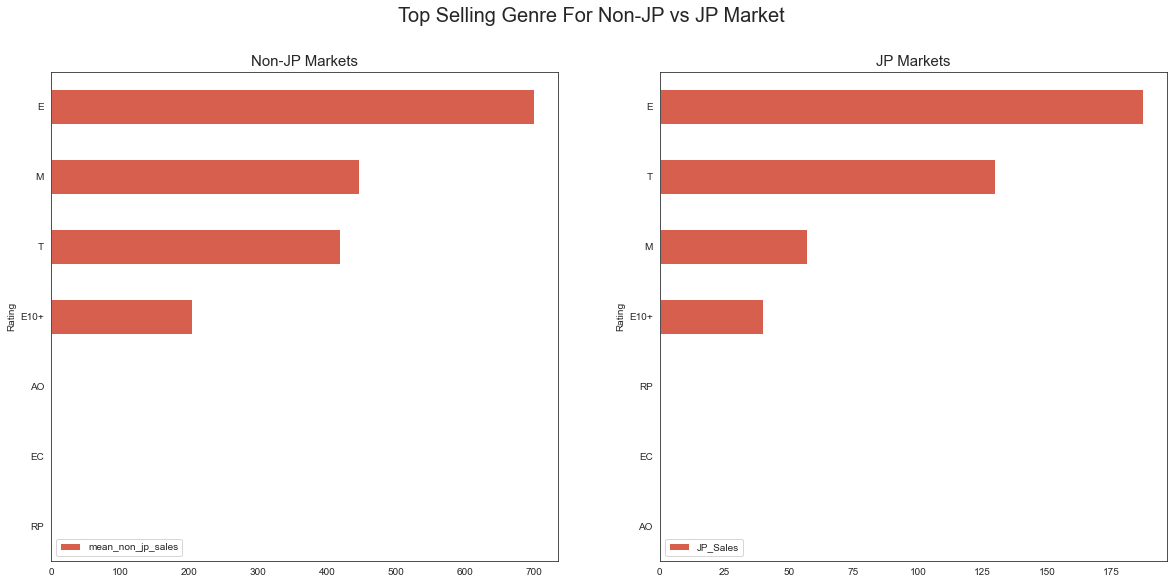

In [54]:
# Set plot axis at 1X2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,6)) 
# Set y axis range
#plt.ylim(0,200)

# Create plot 1
rating_non_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[0])

# Create plot 2
rating_jp_sales.plot(kind='barh', figsize = (20,9), ax=axes[1])

plt.suptitle('Top Selling Genre For Non-JP vs JP Market', fontsize=20) # top level title
axes[0].set_title('Non-JP Markets', fontsize=15) #set title for first plot
axes[1].set_title('JP Markets', fontsize=15) #set title for second plot

M was top 2 best selling genre in Non-JP markets, but only number 3 in JP market - indicating a very popular rating that has not yet hit its potential in JP market

### Game 2 - in an emerging space that has been historically underserved.

#### Recommendation

- In order to have a strong chance of success in an emerging space that has been historically underserved in Japan, it is recommended to release a product that has been hugely popular across the other markets (NA, EU, Others) but not as close in popularity in Japan. The recommmendation will be to release a product that is: X360 platform, Shooting genre with a 'M' rating.

#### Summary

- X360 was top 2 best selling platform in Non-JP markets, but only number 9 in JP market - indicating a very popular platform that has not yet hit its potential in JP market.
- Shooter was top 3 best selling genre in Non-JP markets, but only number 9 in JP market - indicating a very popular genre that has not yet hit its potential in JP market.
- M was top 2 best selling genre in Non-JP markets, but only number 3 in JP market - indicating a very popular rating that has not yet hit its potential in JP market.